Lambda School Data Science

*Unit 2, Sprint 1, Module 3*

---

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
#else:
    #DATA_PATH = '../data/'



# Module Project: Ridge Regression

For this project, you'll return to the Tribecca Condo dataset. But this time, you'll look at the _entire_ dataset and try to predict property sale prices.

The [NYC Department of Finance](https://www1.nyc.gov/site/finance/taxes/property-rolling-sales-data.page) has a glossary of property sales terms and NYC Building Class Code Descriptions. The data comes from the [NYC OpenData](https://data.cityofnewyork.us/browse?q=NYC%20calendar%20sales) portal.

## Directions

The tasks for this project are the following:

- **Task 1:** Import `csv` file using `wrangle` function.
- **Task 2:** Conduct exploratory data analysis (EDA), and modify `wrangle` function to engineer two subset your dataset to one-family dwellings whose price is between \\$100,000 and \\$2,000,000.
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline mean absolute error for your dataset.
- **Task 6:** Build and train a `OneHotEncoder`, and transform `X_train` and `X_test`.
- **Task 7:** Build and train a `LinearRegression` model.
- **Task 8:** Build and train a `Ridge` model.
- **Task 9:** Calculate the training and test mean absolute error for your `LinearRegression` model.
- **Task 10:** Calculate the training and test mean absolute error for your `Ridge` model.
- **Task 11:** Create a horizontal bar chart showing the 10 most influencial features for your `Ridge` model. 

**Note**

You should limit yourself to the following libraries for this project:

- `category_encoders`
- `matplotlib`
- `pandas`
- `sklearn`

# I. Wrangle Data

In [2]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

def wrangle(filepath):
    # Import csv file
    cols = ['BOROUGH', 'NEIGHBORHOOD',
            'BUILDING CLASS CATEGORY', 'GROSS SQUARE FEET',  
            'YEAR BUILT', 'SALE PRICE', 'SALE DATE']
    df = pd.read_csv(filepath, usecols=cols, parse_dates=['SALE DATE'],index_col='SALE DATE')
    #df['SALE PRICE'] = df['SALE PRICE'].astype(int)
    #df['BOROUGH'] = df['BOROUGH'].astype(object)
    df['BOROUGH'] = df['BOROUGH'].astype(object)
    df['SALE PRICE'] = df['SALE PRICE'].str.replace('$', '')
    df['SALE PRICE'] = df['SALE PRICE'].str.replace('-', '')
    df['SALE PRICE'] = df['SALE PRICE'].str.replace(' ', '')
    df['SALE PRICE'] = df['SALE PRICE'].str.replace(',', '')
    df['SALE PRICE'] = df['SALE PRICE'].astype(int)
    df_filtered = df[(df['BUILDING CLASS CATEGORY'] == '01 ONE FAMILY DWELLINGS')]
    df_filtered = df[(df['SALE PRICE'] >= 100000) & (df['SALE PRICE'] <= 2000000)]
    df_filtered.dropna(inplace=True)
    return df_filtered

filepath = (DATA_PATH +'condos/NYC_Citywide_Rolling_Calendar_Sales.csv')

**Task 1:** Use the above `wrangle` function to import the `NYC_Citywide_Rolling_Calendar_Sales.csv` file into a DataFrame named `df`.

In [3]:
#df = df[(df['closing_price'] >= 99) & (df['closing_price'] <= 101)]

In [4]:
#df[(condition1)&(condition2)]

In [5]:
#\$100,000 and \$2,000,000

In [6]:
df = wrangle(filepath)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [7]:
df.shape

(13448, 6)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 13448 entries, 2019-01-01 to 2019-04-30
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   BOROUGH                  13448 non-null  object 
 1   NEIGHBORHOOD             13448 non-null  object 
 2   BUILDING CLASS CATEGORY  13448 non-null  object 
 3   GROSS SQUARE FEET        13448 non-null  float64
 4   YEAR BUILT               13448 non-null  float64
 5   SALE PRICE               13448 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 735.4+ KB


In [9]:
df.tail(20)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
SALE DATE,,,,,,
2019-04-30,4,JAMAICA,01 ONE FAMILY DWELLINGS,1492.0,1920.0,1350000
2019-04-30,4,KEW GARDENS,10 COOPS - ELEVATOR APARTMENTS,0.0,1942.0,430000
2019-04-30,4,KEW GARDENS,17 CONDO COOPS,0.0,1960.0,560000
2019-04-30,4,LAURELTON,01 ONE FAMILY DWELLINGS,1422.0,1935.0,574850
2019-04-30,4,LITTLE NECK,01 ONE FAMILY DWELLINGS,1170.0,1955.0,900000
2019-04-30,4,LONG ISLAND CITY,13 CONDOS - ELEVATOR APARTMENTS,755.0,2010.0,892500
2019-04-30,4,OAKLAND GARDENS,01 ONE FAMILY DWELLINGS,896.0,1950.0,655000
2019-04-30,4,REGO PARK,01 ONE FAMILY DWELLINGS,1755.0,1950.0,800000
2019-04-30,4,RICHMOND HILL,02 TWO FAMILY DWELLINGS,1376.0,1930.0,690000


In [10]:
df.info

<bound method DataFrame.info of            BOROUGH             NEIGHBORHOOD  ... YEAR BUILT  SALE PRICE
SALE DATE                                    ...                       
2019-01-01       3      OCEAN PARKWAY-NORTH  ...     1930.0      550000
2019-01-01       4           QUEENS VILLAGE  ...     1940.0      200000
2019-01-02       1                  CHELSEA  ...     2013.0     2000000
2019-01-02       1             MIDTOWN EAST  ...     1960.0      330000
2019-01-02       1  UPPER EAST SIDE (79-96)  ...     1925.0      600000
...            ...                      ...  ...        ...         ...
2019-04-30       4               ST. ALBANS  ...     1945.0      510000
2019-04-30       4                SUNNYSIDE  ...     1929.0      355000
2019-04-30       4                SUNNYSIDE  ...     1932.0      375000
2019-04-30       4                WOODHAVEN  ...     1931.0     1100000
2019-04-30       4                 WOODSIDE  ...     1927.0      569202

[13448 rows x 6 columns]>

**Task 2:** Modify the above `wrangle` function so that:

- The column `'SALE DATE'` becomes the `DatetimeIndex`.
- The dtype for the `'BOROUGH'` column is `object`, not `int`.
- The dtype for the `'SALE PRICE'` column is `int`, not `object`.
- The dataset includes only one-family dwellings (`BUILDING CLASS CATEGORY == '01 ONE FAMILY DWELLINGS'`).
- The dataset includes only properties whose sale price is between \\$100,000 and \\$2,000,000.

In [11]:
# Perform your exploratory data analysis here and
# modify the wrangle function above

# II. Split Data

**Task 3:** Split your dataset into the feature matrix `X` and the target vector `y`. You want to predict `'SALE_PRICE'`.

In [12]:
target = 'SALE PRICE'
X = df.drop(columns=target)
y = df[target]

**Task 4:** Split `X` and `y` into a training set (`X_train`, `y_train`) and a test set (`X_test`, `y_test`).

- Your training set should include data from January to March 2019. 
- Your test set should include data from April 2019.

In [13]:
cutoff = '2019-04-01'
mask = X.index < cutoff

X_train, y_train = X.loc[mask], y.loc[mask]
X_test, y_test = X.loc[~mask], y.loc[~mask]

# III. Establish Baseline

**Task 5:** Since this is a **regression** problem, you need to calculate the baseline mean absolute error for your model.

In [14]:
y_pred = [y_train.mean()] * len(y_train)

baseline_mae = mean_absolute_error(y_train, y_pred)
print('Baseline MAE:', baseline_mae)

Baseline MAE: 318959.14090258954


# IV. Build Model 

**Task 6:** Build and train a `OneHotEncoder` and then use it to transform `X_train` and `X_test`.

In [15]:
from category_encoders import OneHotEncoder

ohe = OneHotEncoder(use_cat_names=True)
ohe.fit(X_train)
XT_train = ohe.transform(X_train)
XT_test = ohe.transform(X_test)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


**Task 7:** Build and train a `LinearRegression` model named `model_lr`. Remember to train your model using your _transformed_ feature matrix.

In [16]:
model_lr = LinearRegression()
model_lr.fit(XT_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Task 8:** Build and train a `Ridge` model named `model_r`. Remember to train your model using your _transformed_ feature matrix.

In [17]:
model_r = Ridge(alpha=1.0)
model_r.fit(XT_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

# V. Check Metrics

**Task 9:** Check the training and test metrics for `model_lr`.

In [18]:
training_mae_lr = mean_absolute_error(y_train, model_lr.predict(XT_train))
test_mae_lr = mean_absolute_error(y_test, model_lr.predict(XT_test))

print('Linear Training MAE:', training_mae_lr)
print('Linear Test MAE:', test_mae_lr)

Linear Training MAE: 206234.1582141175
Linear Test MAE: 1009926649.7767904


**Task 10:** Check the training and test metrics for `model_r`.

In [19]:
training_mae_r = mean_absolute_error(y_train, model_r.predict(XT_train))
test_mae_r = mean_absolute_error(y_test, model_r.predict(XT_test))

print('Ridge Training MAE:', training_mae_r)
print('Ridge Test MAE:', test_mae_r)

Ridge Training MAE: 206574.3084593476
Ridge Test MAE: 218007.39599252865


**Stretch Goal:** Calculate the training and test $R^2$ scores `model_r`.

In [22]:
# Caculate R^2 score
model_r_train_r2_score = model_r.score(XT_train, y_train)
model_r_test_r2_score = model_r.score(XT_test, y_test)

print('Linear Regression R^2:', model_r_train_r2_score)
print('Ridge Regression R^2:', model_r_test_r2_score)

Linear Regression R^2: 0.5052206755366226
Ridge Regression R^2: 0.4902470357171631


# IV. Communicate Results

**Task 11:** Create a horizontal barchart that plots the 10 most important coefficients for `model_r`, sorted by absolute value. Your figure should look like our example from class:

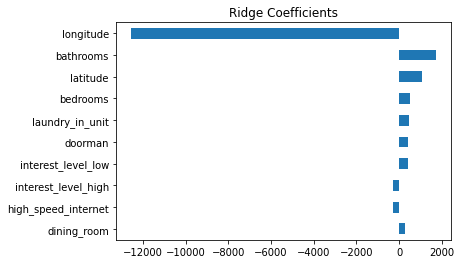

**Note:** Your figure shouldn't be identical to the one above. Your model will have different coefficients since it's been trained on different data. Only the formatting should be the same.

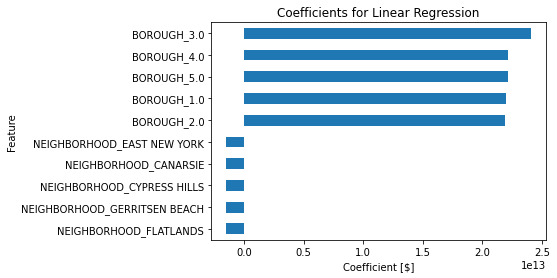

In [23]:
coefficients = model_lr.coef_
features = ohe.get_feature_names()
feat_imp = pd.Series(coefficients, index=features).sort_values(key=abs)
feat_imp.tail(10).plot(kind='barh')
plt.xlabel('Coefficient [$]')
plt.ylabel('Feature')
plt.title('Coefficients for Linear Regression');